In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense,Conv2D, MaxPooling2D
from tensorflow.keras.layers import UpSampling2D, Flatten, Reshape 
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float')/255
# 255로 나눈 이유, 전체 픽셀 값을  ..?
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float')/255

X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float')/255

In [11]:
# 생성자 모델 만들기
autoencoder = Sequential() 
  
# 인코딩 부분
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same')) 
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu')) 
  
# 디코딩 부분
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))
  
# 전체 구조 확인
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)          

In [13]:
# 컴파일 및 학습을 하는 부분
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.0637 - val_loss: 2.5594
Epoch 2/50
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0040 - val_loss: 2.7893
Epoch 3/50
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.0040 - val_loss: 3.5409
Epoch 4/50
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0040 - val_loss: 5.8643
Epoch 5/50
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0039 - val_loss: 9.6619
Epoch 6/50
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.0039 - val_loss: 10.2396
Epoch 7/50
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.0038 - val_loss: 10.6265
Epoch 8/50
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.0038 - val_loss: 11.0227
Epoch 9/50
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0038 - v

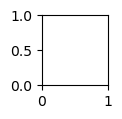

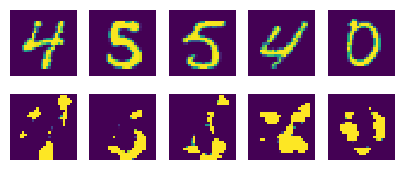

In [19]:
random_test = np.random.randint(X_test.shape[0], size=5)
ae_imgs = autoencoder.predict (X_test)
plt.figure(figsize=(7,2))
for i, imge_idx in enumerate(random_test):
    ax = plt.subplot(2,7, i + 1)
    plt.imshow(X_test[imge_idx].reshape(28,28))
    ax.axis('off')
    ax=plt.subplot(2,7,7 +  i + 1)
    plt.imshow(ae_imgs[imge_idx].reshape(28,28))
    ax.axis('off')
    
plt.show()

차원 축소를 해도 특징을 고스란히 가질 수 있는 것이 엔코더 